# Example code for the SEM analysis module

In [2]:
# Import some dependencies
from pytools_lithography.analysis import (
    separate_objects,
    get_object,
    extract_profiles,
    calculate_profile_psd
)
import os
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

# Only used for getting the test image
from tests.utils import get_test_img_path

In [3]:
# Define some global variables
SHOW_STEPS = True

Load the images. This notebook expects the images to be in the same folder as this file, so make sure to make the path relative to here or change the loading code

In [18]:
# Define the filenames
lines_filename = "./lines_cropped.jpg"
size_bar_filename = "test_analysis_size_bar.jpg"

In [19]:
# Create the full paths
divider = "/" if os.name == "posix" else "\\"
# lines_image_path = get_test_img_path(lines_filename)
lines_image_path = lines_filename
# size_bar_image_path = get_test_img_path(size_bar_filename)

# Check if the files exist
if not os.path.exists(lines_image_path):
    print(f"Error: {lines_image_path} does not exist.")
    exit(1)

# if not os.path.exists(size_bar_image_path):
#     print(f"Error: {size_bar_image_path} does not exist.")
#     exit(1)

# Load the images
lines_image = cv2.imread(lines_image_path)
# size_bar_image = cv2.imread(size_bar_image_path)

# Convert the images to grayscale
lines_image_gray = cv2.cvtColor(lines_image, cv2.COLOR_BGR2GRAY)
# size_bar_image_gray = cv2.cvtColor(size_bar_image, cv2.COLOR_BGR2GRAY)

To make analysis of images with multiple objects possible we need to reduce the original image to multiple images with only one object. These separate objects are then analyzed individually after which the results can be combined.

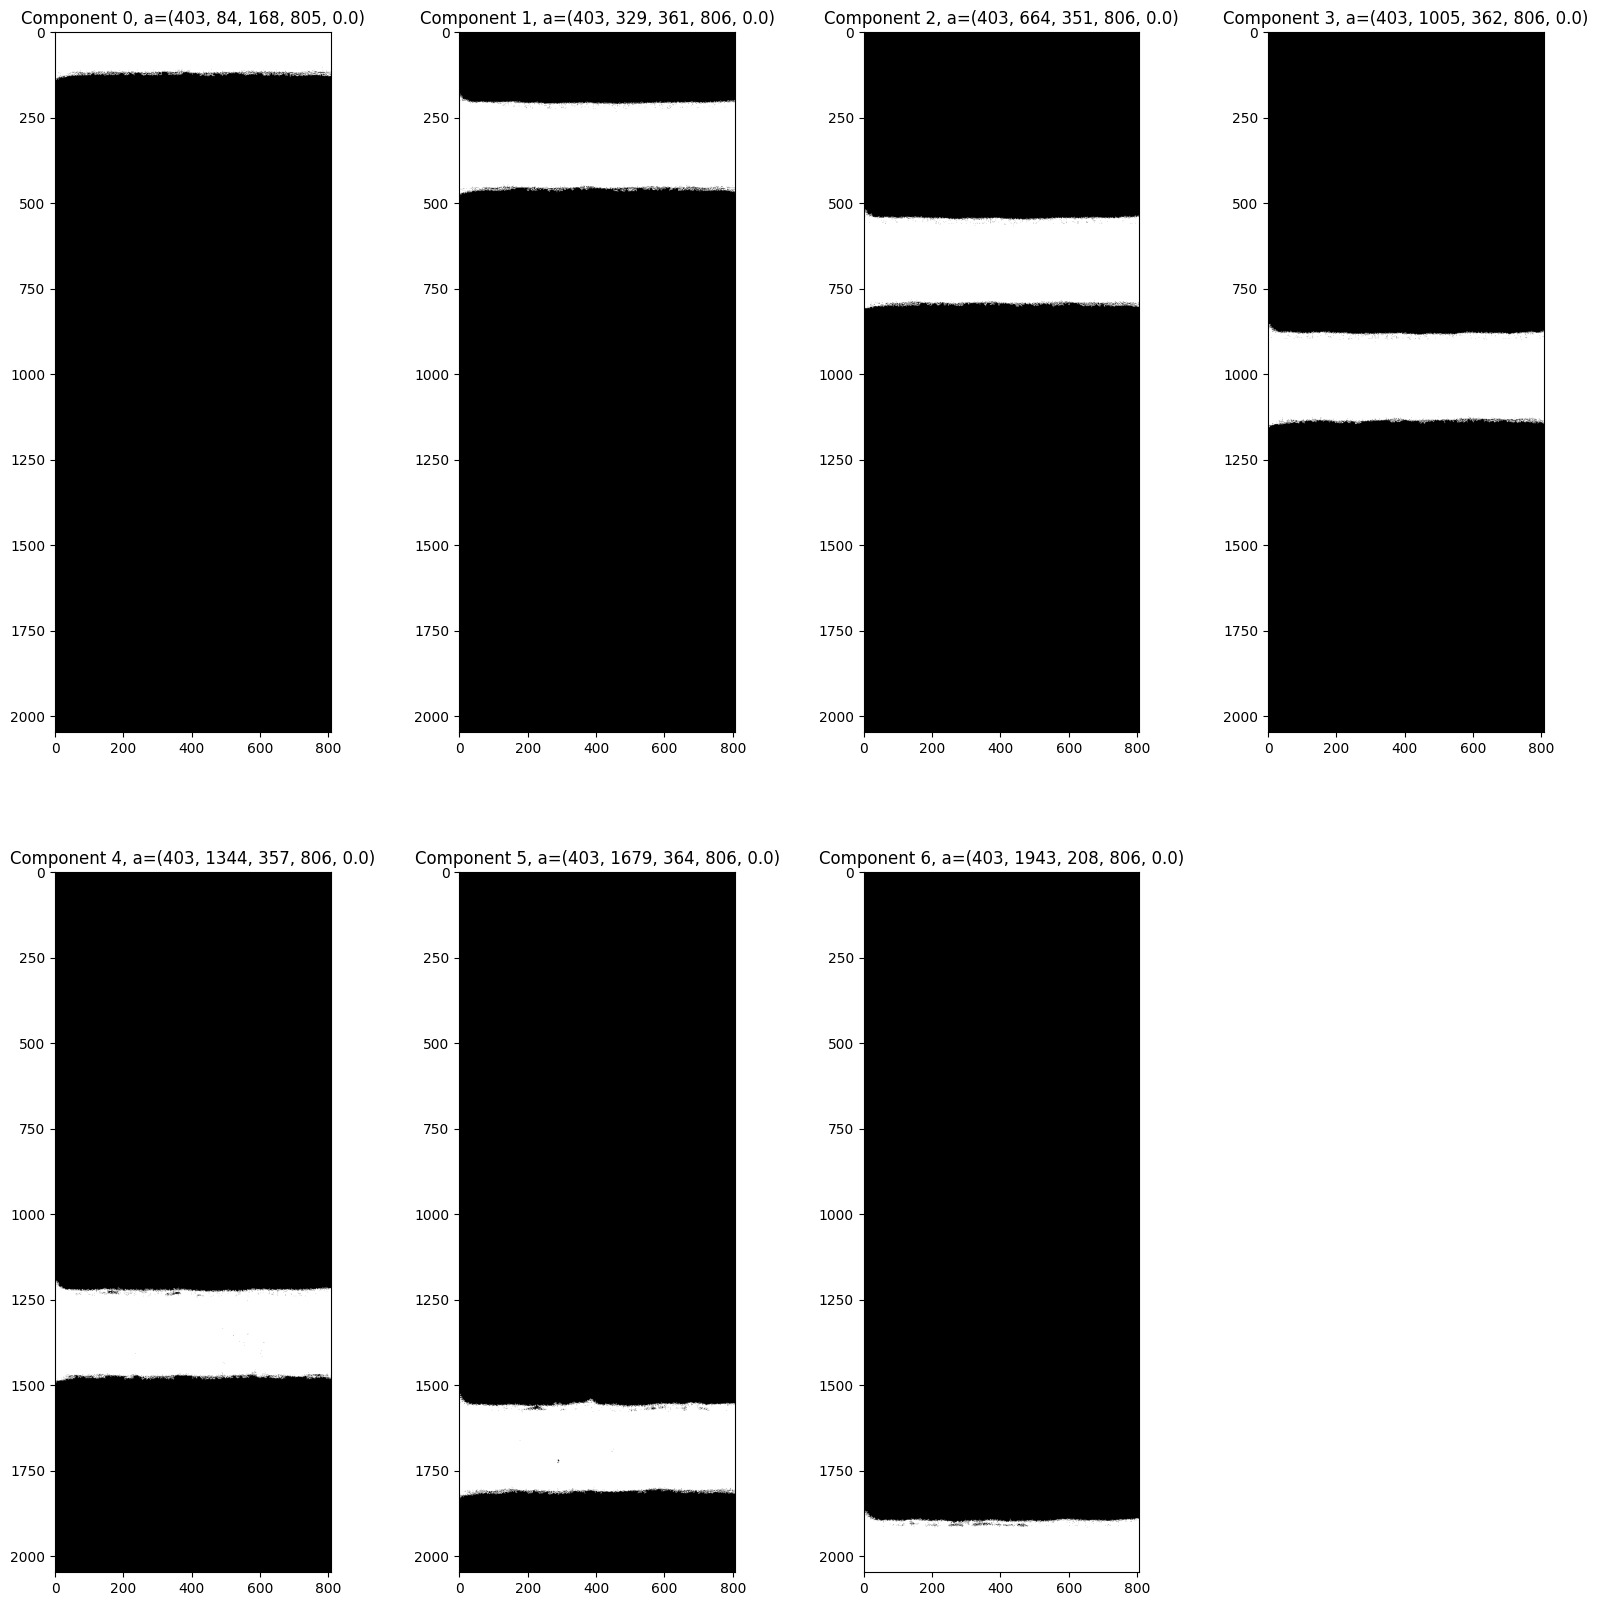

In [20]:
# Get the objects masks and their angles
masks, angles = separate_objects(lines_image_gray, show_steps=SHOW_STEPS)

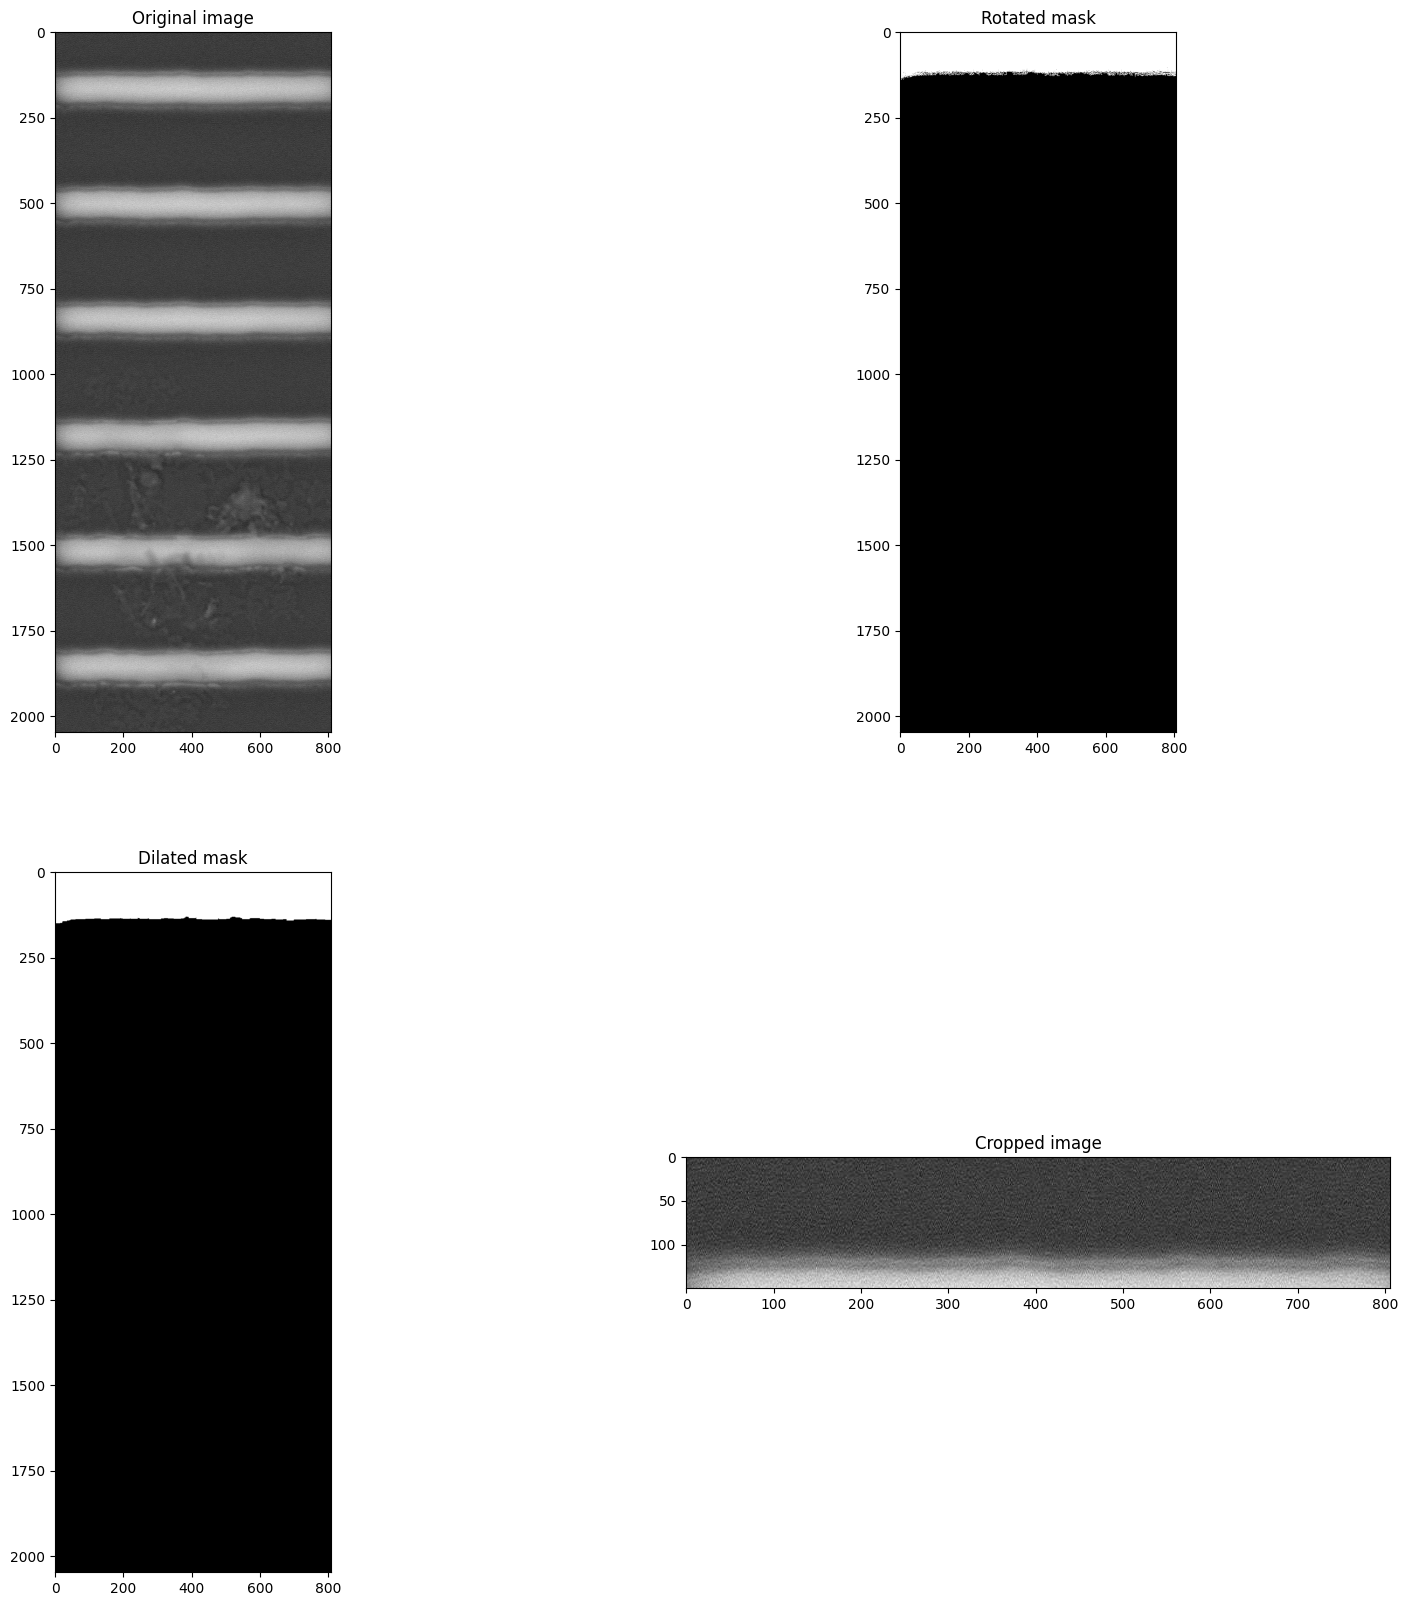

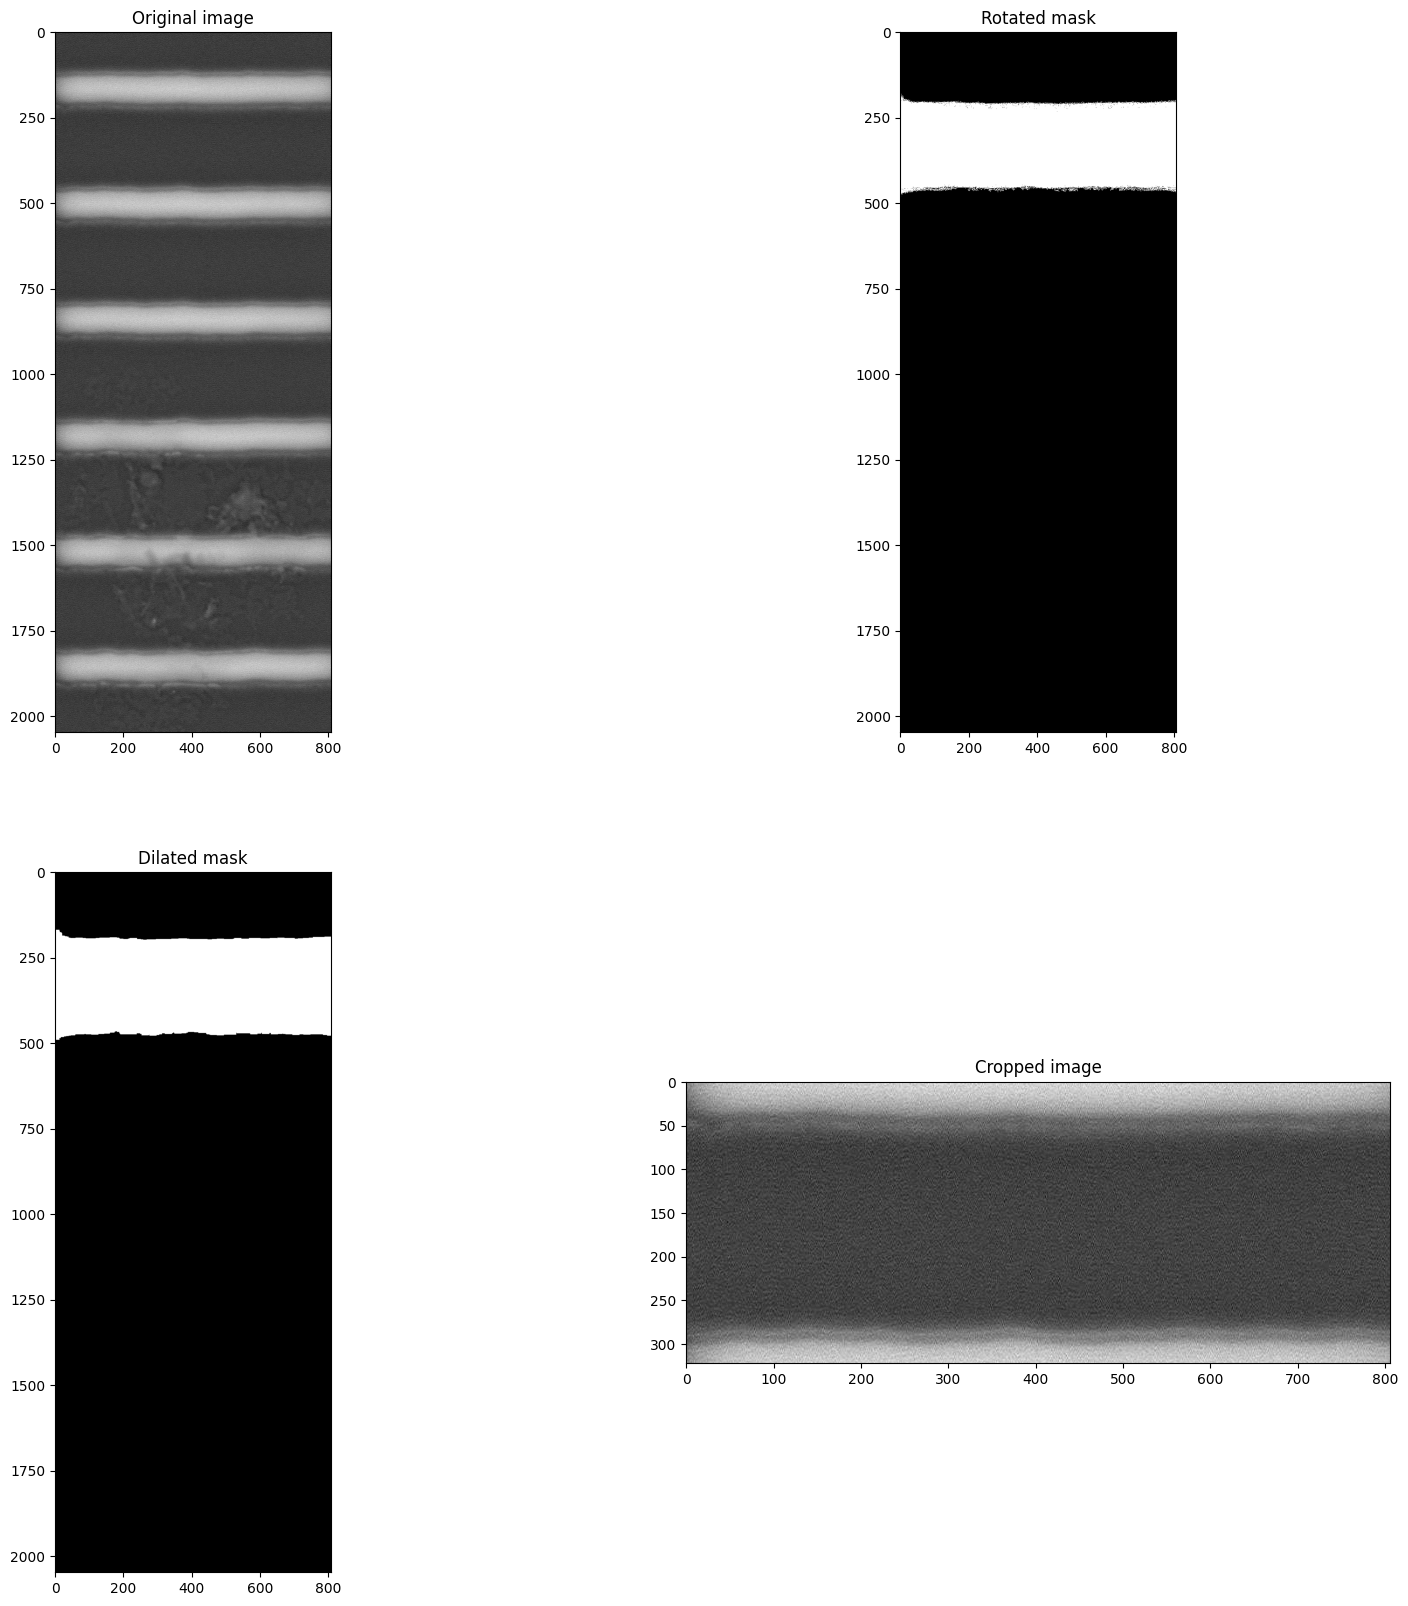

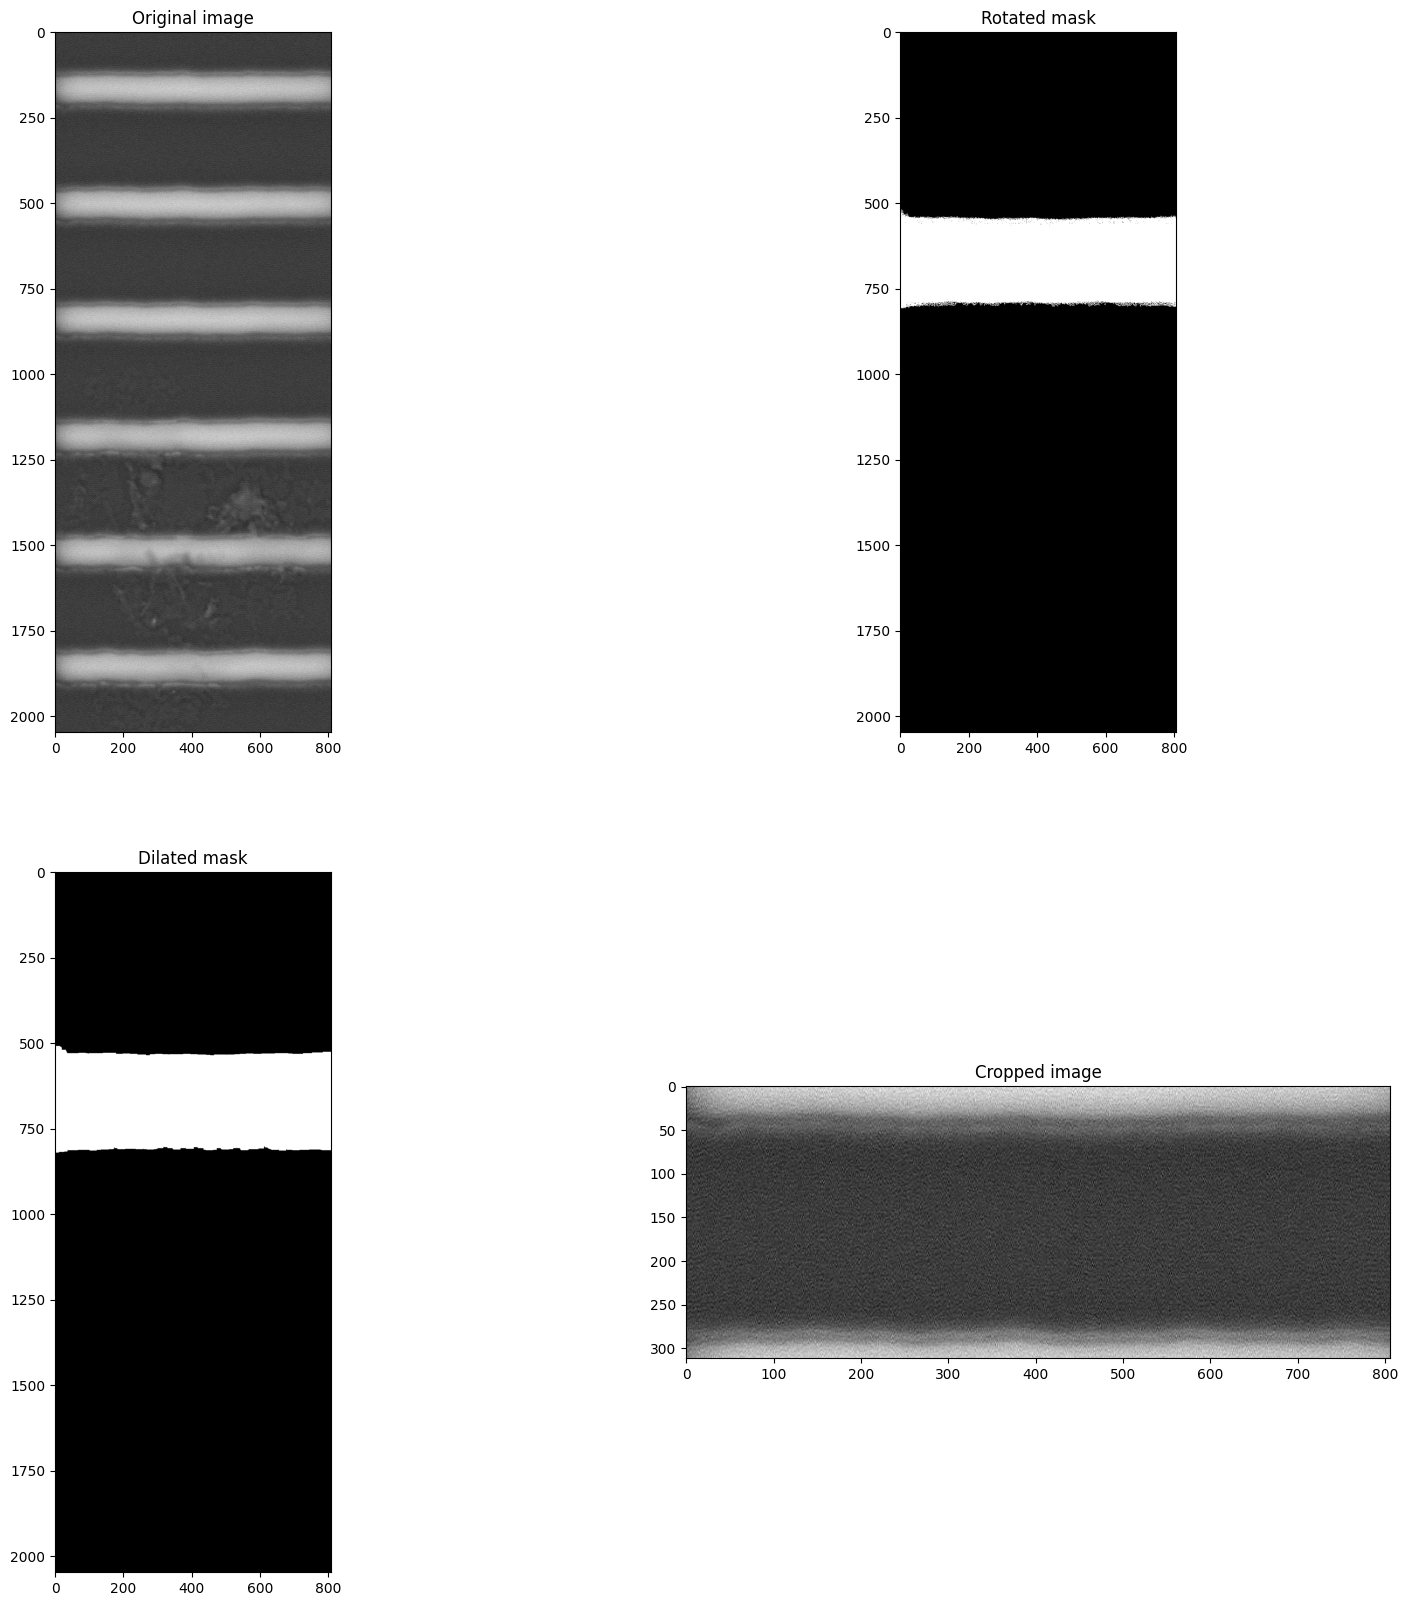

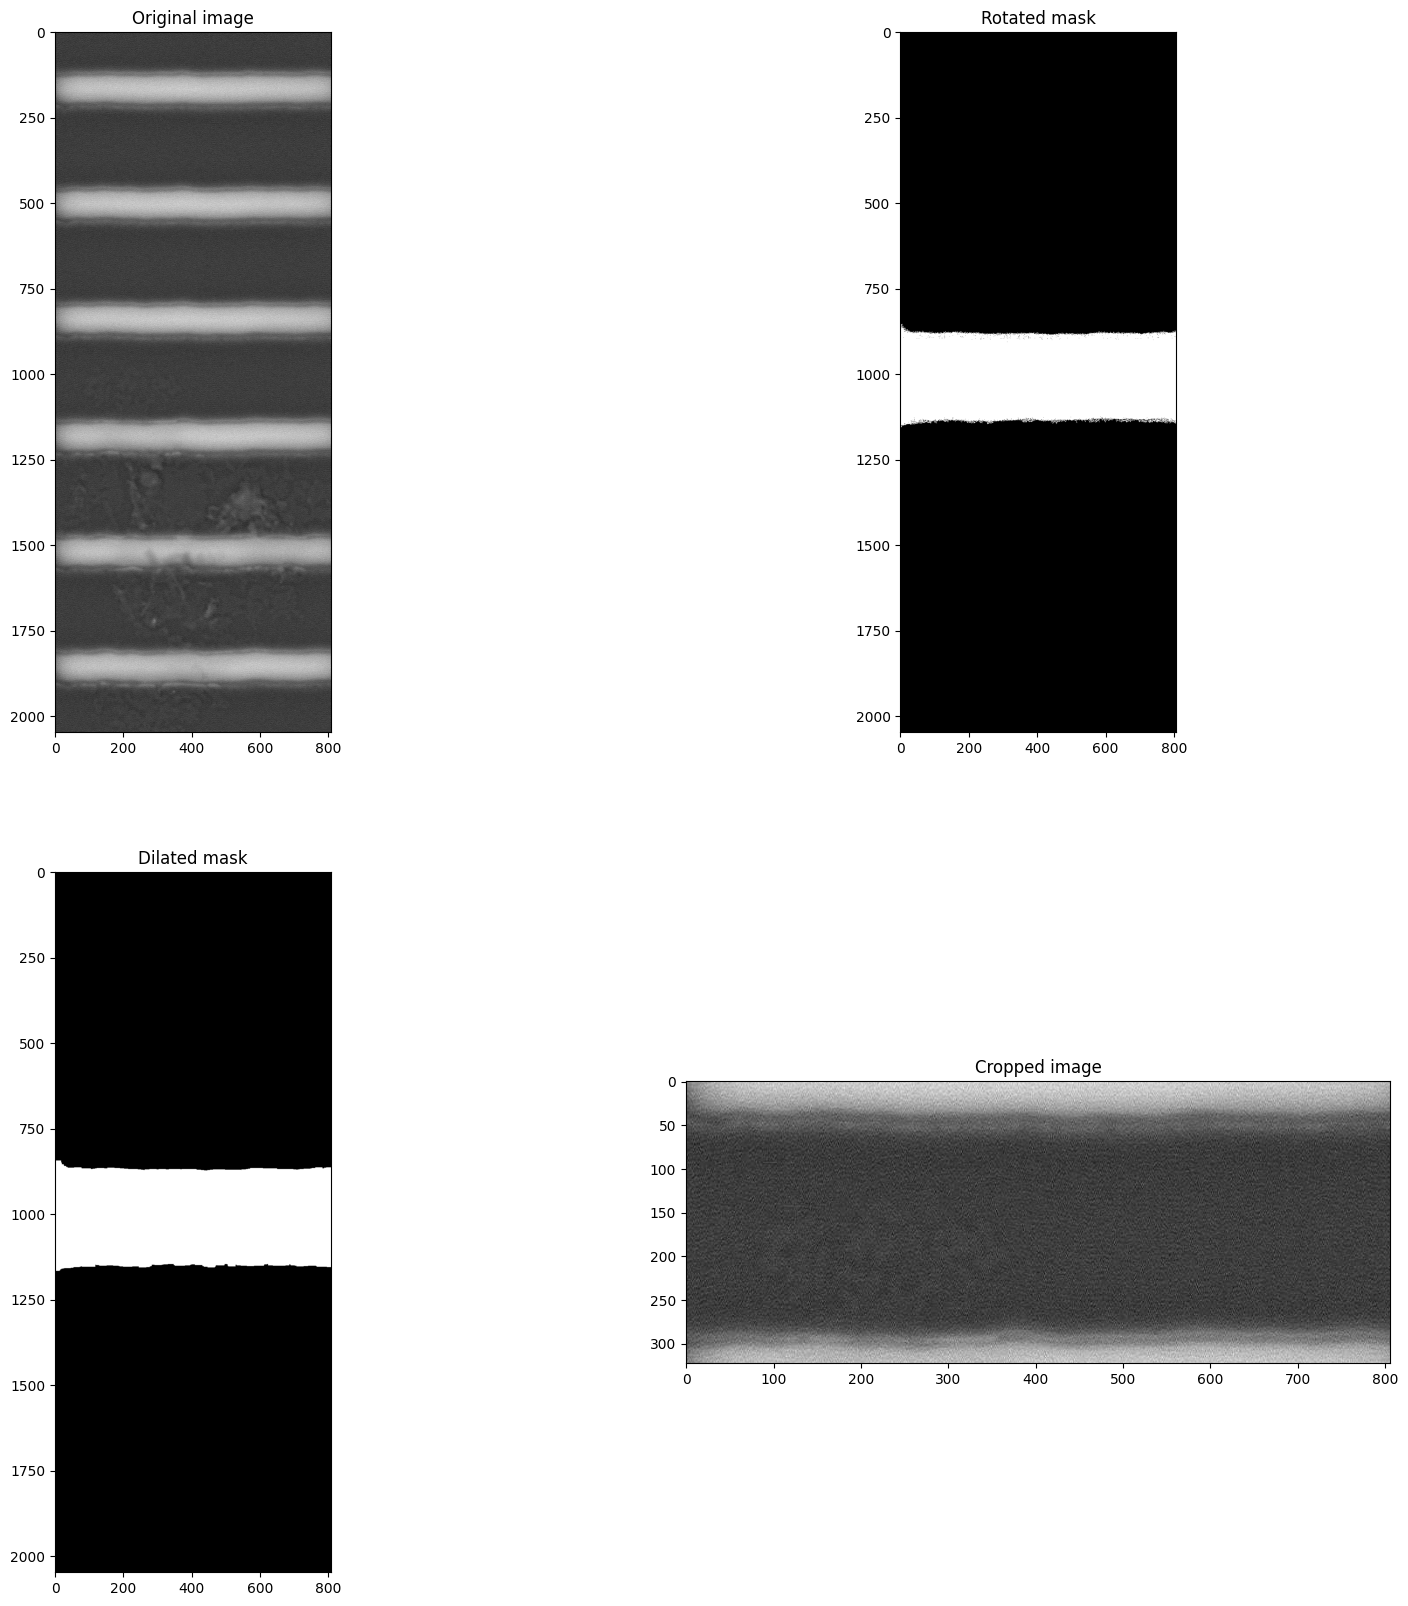

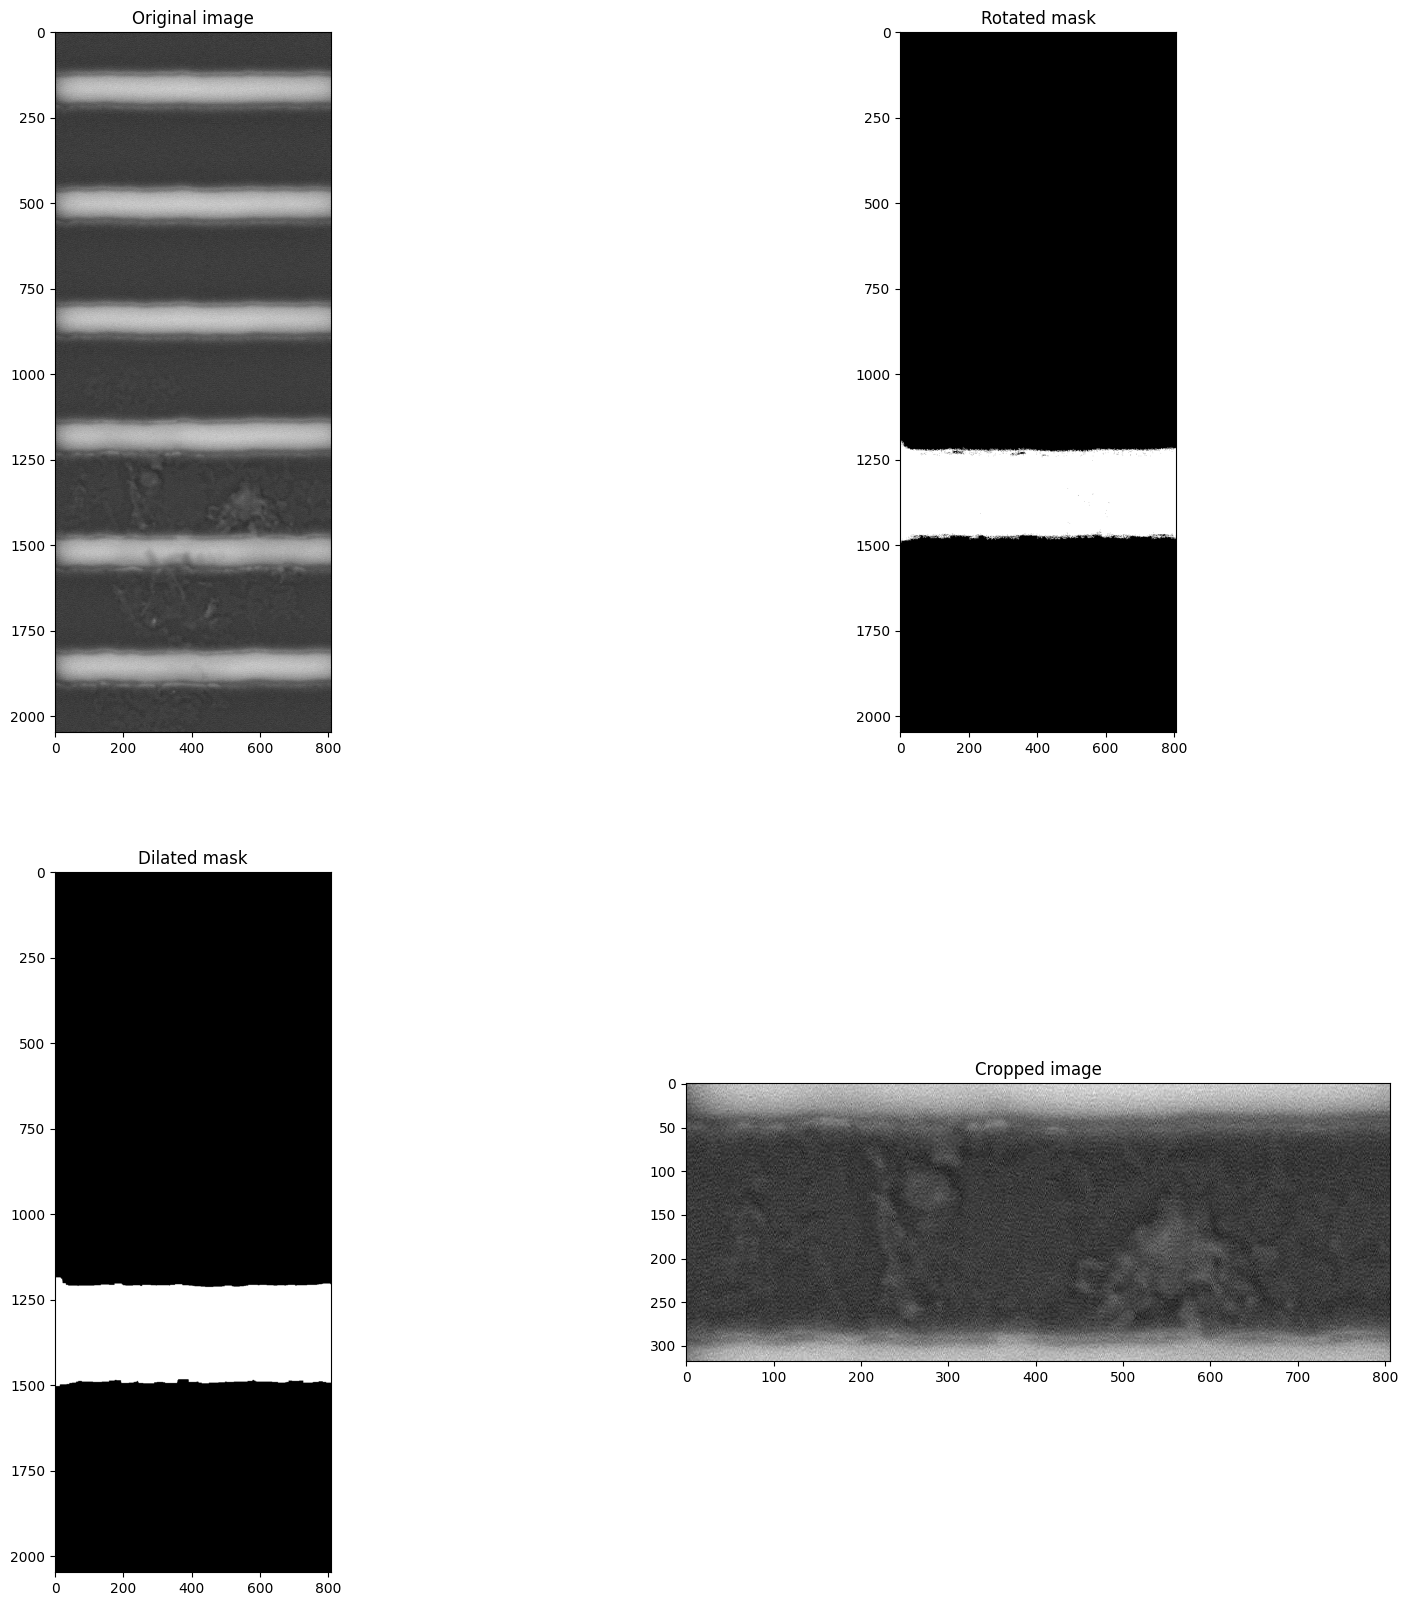

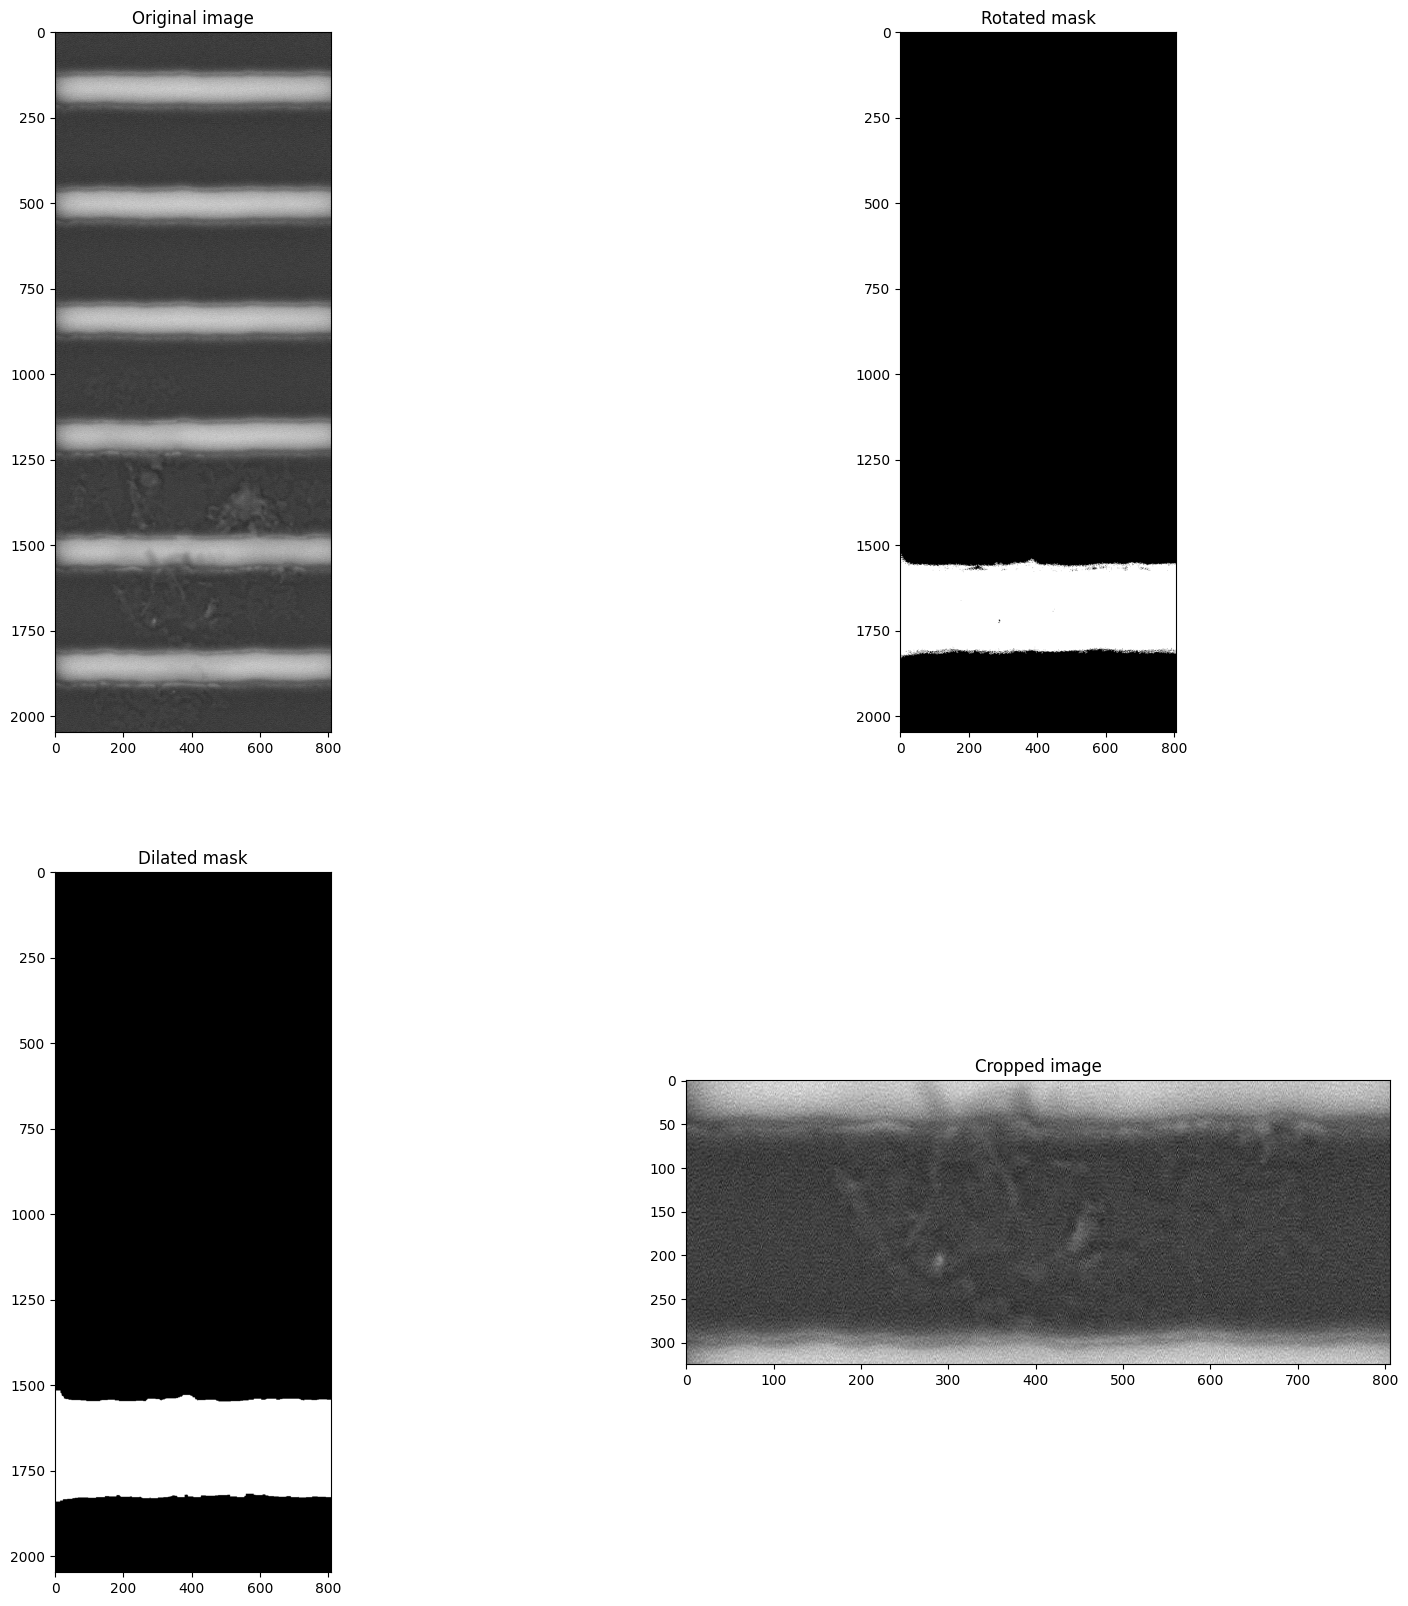

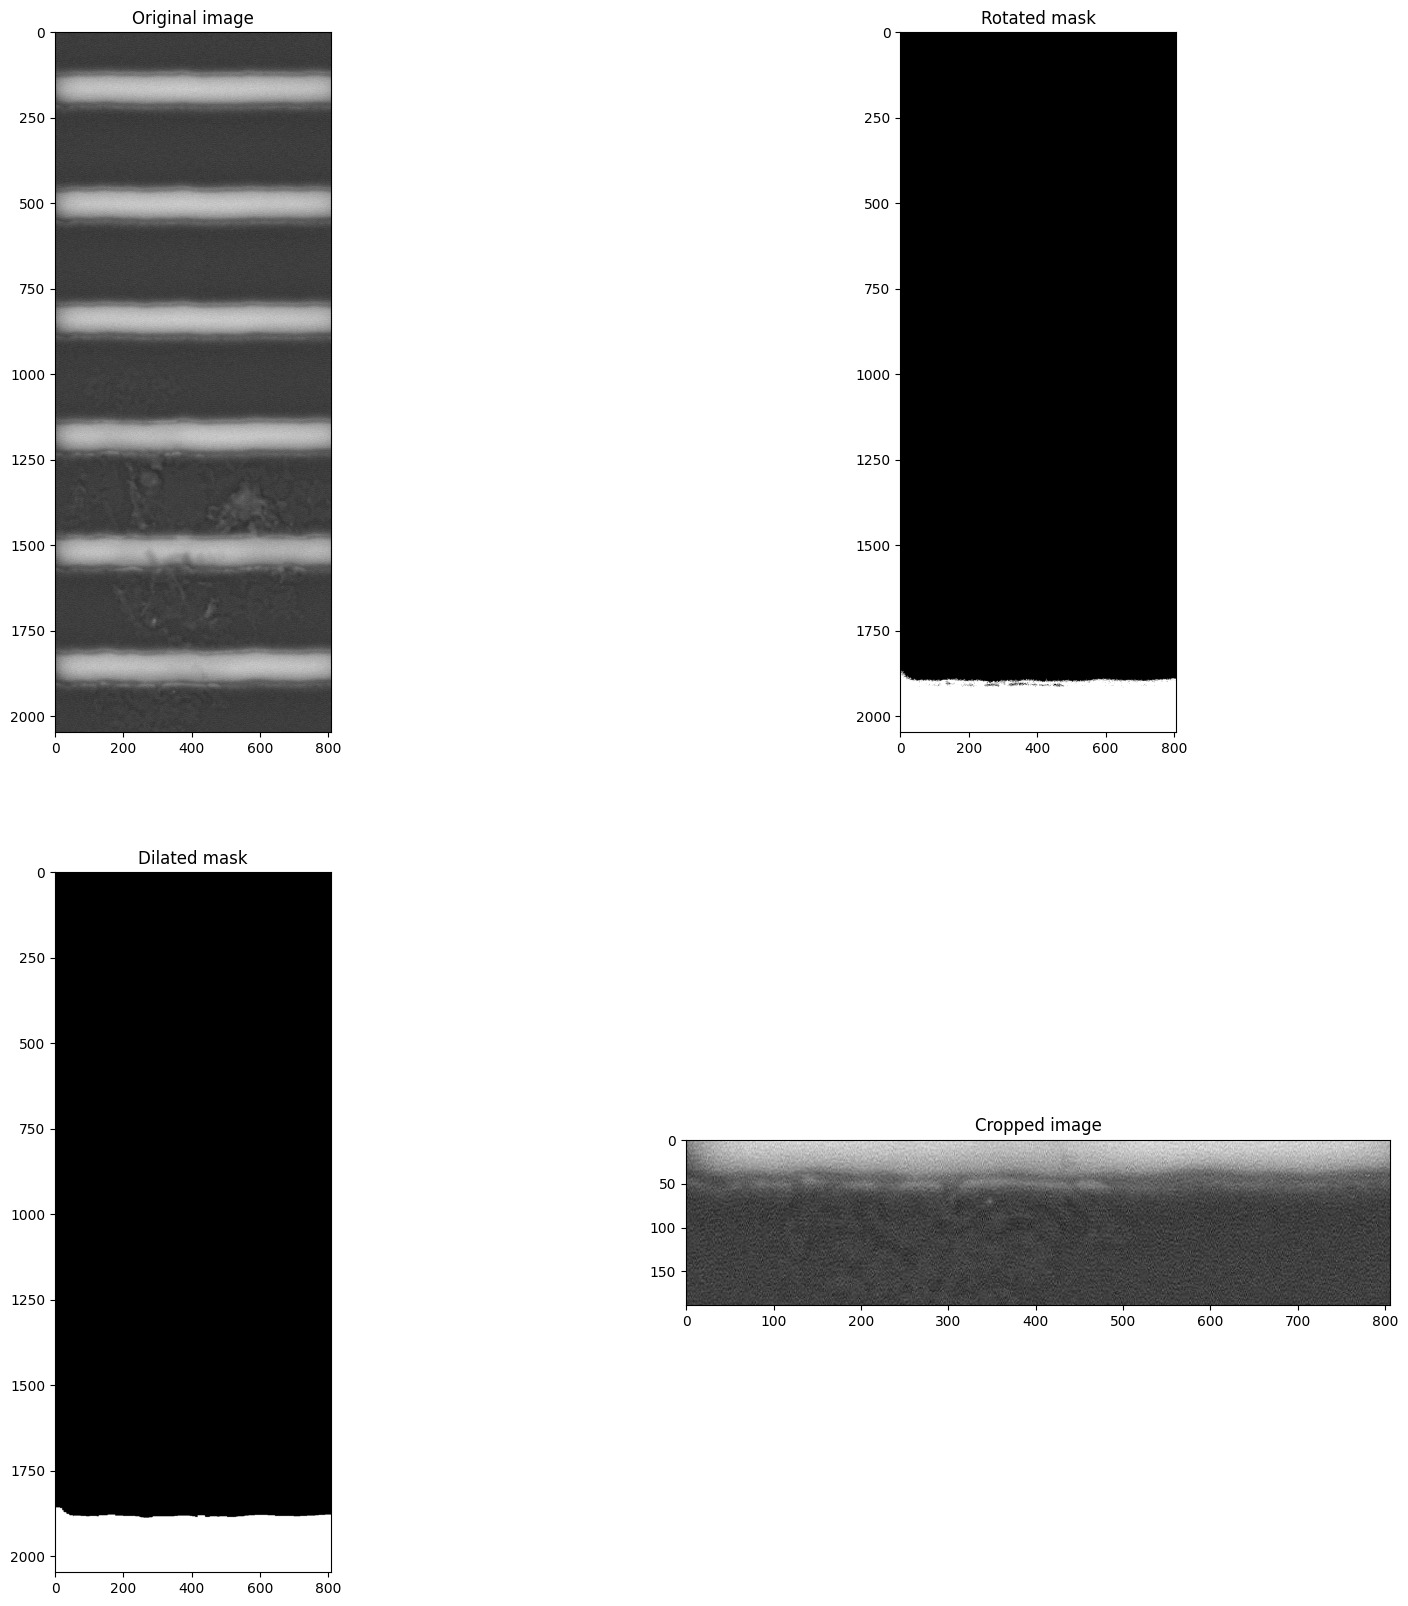

In [21]:
# Get an image for each object. This new image will be a cropped version of the original image
# The object will also be rotation corrected.
object = [get_object(lines_image_gray, mask, show_steps=SHOW_STEPS) for mask in masks]

Okay, we have the objects each in their own image, what now? Now we can extract the profiles and use these to calculate some parameters for the lines in the objects.

/home/nynra/repos/pytools-lithography/src/pytools_lithography/analysis/sem_analysis.py:290: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_right, cov_right = curve_fit(


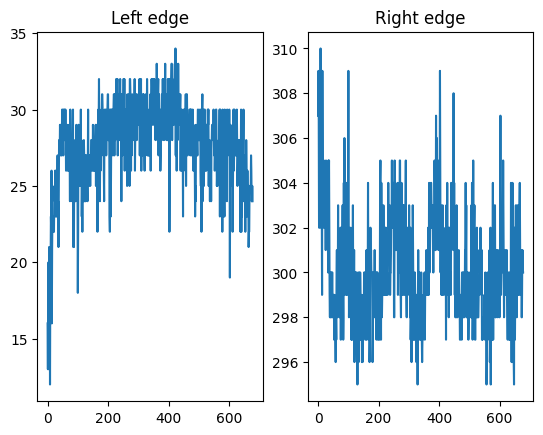

In [32]:
# Extract the first profile
n=1
top, bottom, width = extract_profiles(object[n], show_steps=SHOW_STEPS, accepted_failure=0.8)

In [25]:
# Extract all the profiles
profiles = {}
i = 0
for obj, angle in zip(object, angles):
    top_edge, bottom_edge, width = extract_profiles(
        obj, accepted_failure=0.999, show_steps=SHOW_STEPS, verbose=False
    )
    profiles[i] = {
        "top_edge": top_edge,
        "bottom_edge": bottom_edge,
        "width": width,
    }
    i += 1

Exception: Too many errors occured during fitting. Aborting.

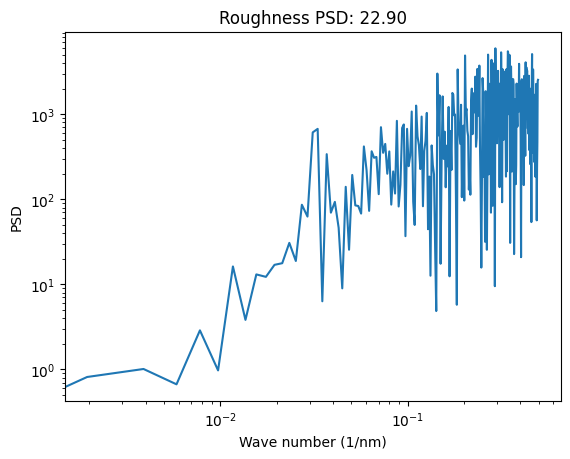

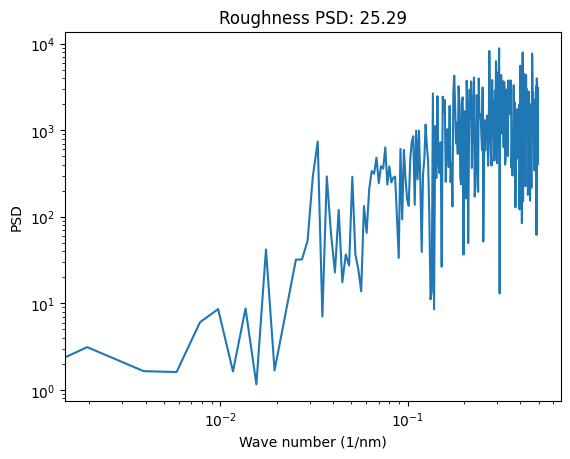

In [9]:

psd, freqs, roughness = calculate_profile_psd(profiles[0]["top_edge"], dx=1, show_steps=SHOW_STEPS)
psd, freqs, roughness = calculate_profile_psd(profiles[0]["bottom_edge"], dx=1, show_steps=SHOW_STEPS)